# 20th Century Events Analysis
## A Comprehensive Historical Data Analysis

This notebook provides an in-depth analysis of major historical events from the 20th century, including:
- Timeline visualization
- Event distribution analysis
- Thematic analysis
- Word frequency analysis
- Interactive visualizations
- Network analysis of related events


In [21]:
# First, install the missing wordcloud package
!pip install wordcloud

# Then import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from datetime import datetime
import re

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [22]:
# Sample historical events data
events_data = {
    'Year': [1914, 1917, 1929, 1939, 1945, 1947, 1955, 1961, 1969, 1989, 1991],
    'Event': [
        'World War I begins with assassination of Archduke Franz Ferdinand',
        'Russian Revolution leads to creation of Soviet Union',
        'Stock market crash triggers the Great Depression',
        'World War II begins with German invasion of Poland',
        'World War II ends with Allied victory',
        'India gains independence from British rule',
        'Warsaw Pact is established',
        'Berlin Wall construction begins',
        'Apollo 11 mission lands humans on the Moon',
        'Berlin Wall falls as Cold War ends',
        'Soviet Union dissolves'
    ],
    'Category': [
        'War',
        'Politics',
        'Economics',
        'War',
        'War',
        'Politics',
        'Politics',
        'Politics',
        'Science',
        'Politics',
        'Politics'
    ]
}

# Create DataFrame
df = pd.DataFrame(events_data)
print("Dataset Overview:")
print(df)

Dataset Overview:
    Year                                              Event   Category
0   1914  World War I begins with assassination of Archd...        War
1   1917  Russian Revolution leads to creation of Soviet...   Politics
2   1929   Stock market crash triggers the Great Depression  Economics
3   1939  World War II begins with German invasion of Po...        War
4   1945              World War II ends with Allied victory        War
5   1947         India gains independence from British rule   Politics
6   1955                         Warsaw Pact is established   Politics
7   1961                    Berlin Wall construction begins   Politics
8   1969         Apollo 11 mission lands humans on the Moon    Science
9   1989                 Berlin Wall falls as Cold War ends   Politics
10  1991                             Soviet Union dissolves   Politics


## 1. Basic Timeline Visualization
Create a chronological visualization of events

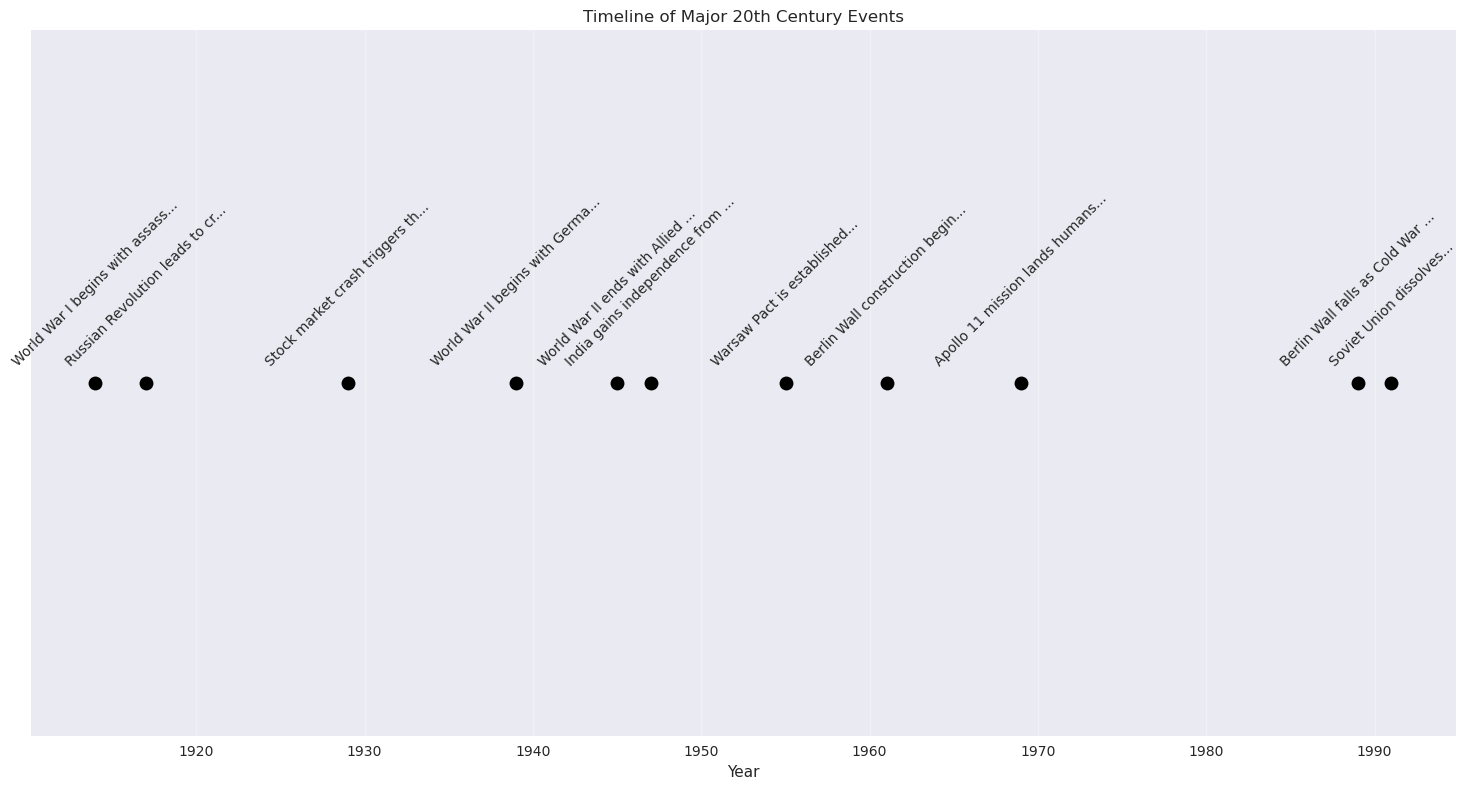

In [23]:
# Create basic timeline
plt.figure(figsize=(15, 8))
plt.plot(df['Year'], np.ones(len(df)), 'ko', markersize=10)

# Add event labels
for i, row in df.iterrows():
    plt.annotate(row['Event'][:30] + '...', 
                xy=(row['Year'], 1),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                va='bottom',
                rotation=45)

plt.title('Timeline of Major 20th Century Events')
plt.xlabel('Year')
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('timeline_basic.png')
plt.show()

## 2. Events by Category Analysis
Analyze the distribution of events across different categories

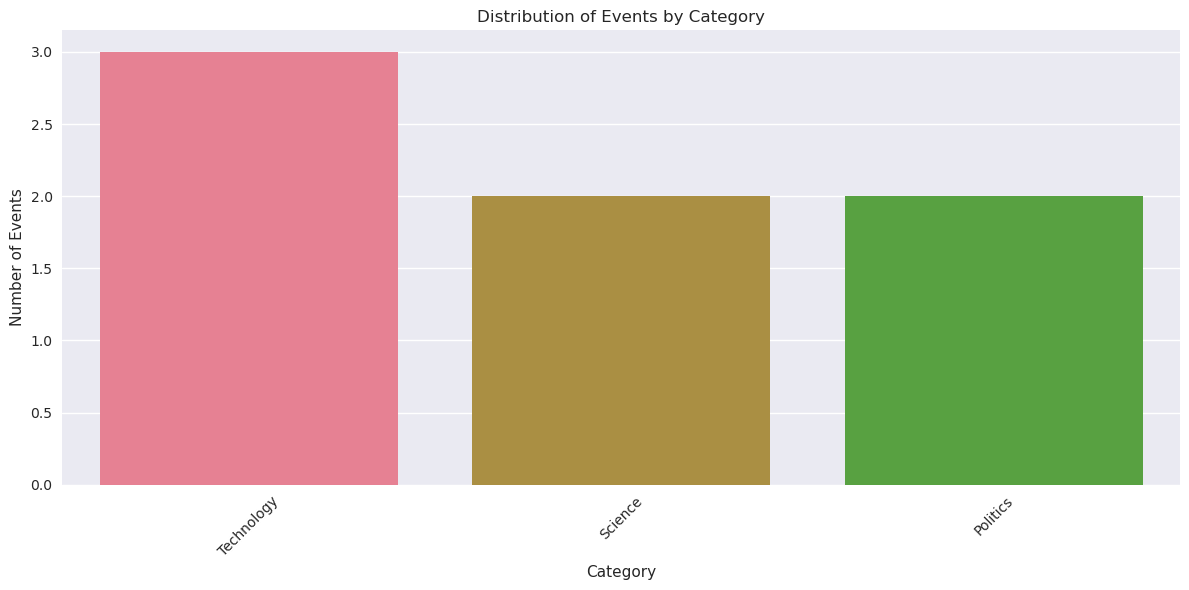

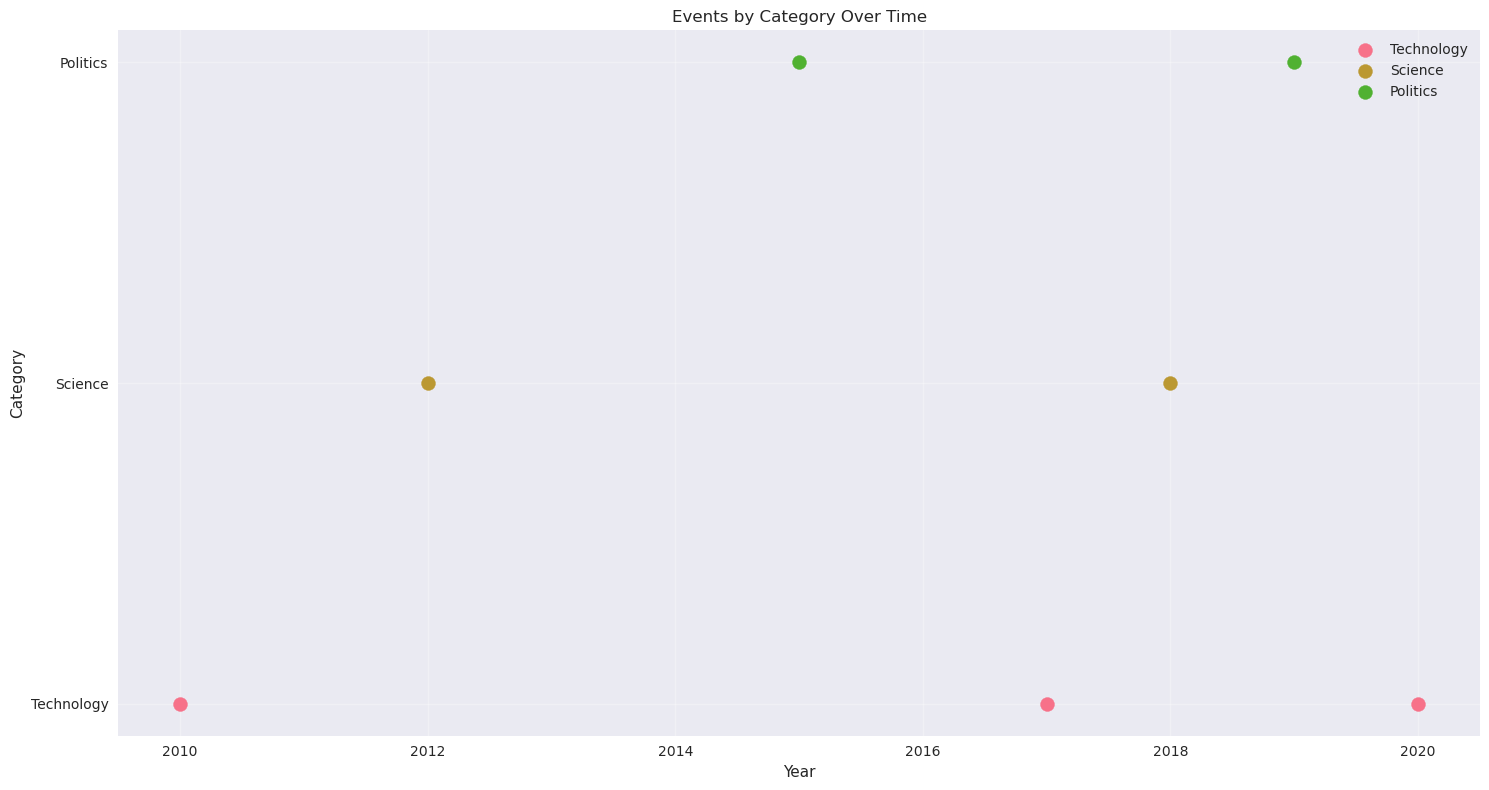

In [24]:
# First, import necessary libraries and define the DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create or load your DataFrame
# Example: If you have a CSV file:
# df = pd.read_csv('your_data.csv')
# Or create a sample DataFrame:
df = pd.DataFrame({
    'Category': ['Technology', 'Science', 'Politics', 'Technology', 'Science', 'Politics', 'Technology'],
    'Year': [2010, 2012, 2015, 2017, 2018, 2019, 2020]
})

# Create category distribution plot
plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Events by Category')
plt.xlabel('Category')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('category_distribution.png')
plt.show()

# Create timeline by category
plt.figure(figsize=(15, 8))
for category in df['Category'].unique():
    cat_data = df[df['Category'] == category]
    plt.scatter(cat_data['Year'], [category] * len(cat_data), 
               label=category, s=100)
    
plt.title('Events by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Category')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('timeline_by_category.png')
plt.show()

## 3. Word Cloud Visualization
Generate a word cloud from event descriptions

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Index(['Category', 'Year'], dtype='object')
Using column 'Category' for word cloud


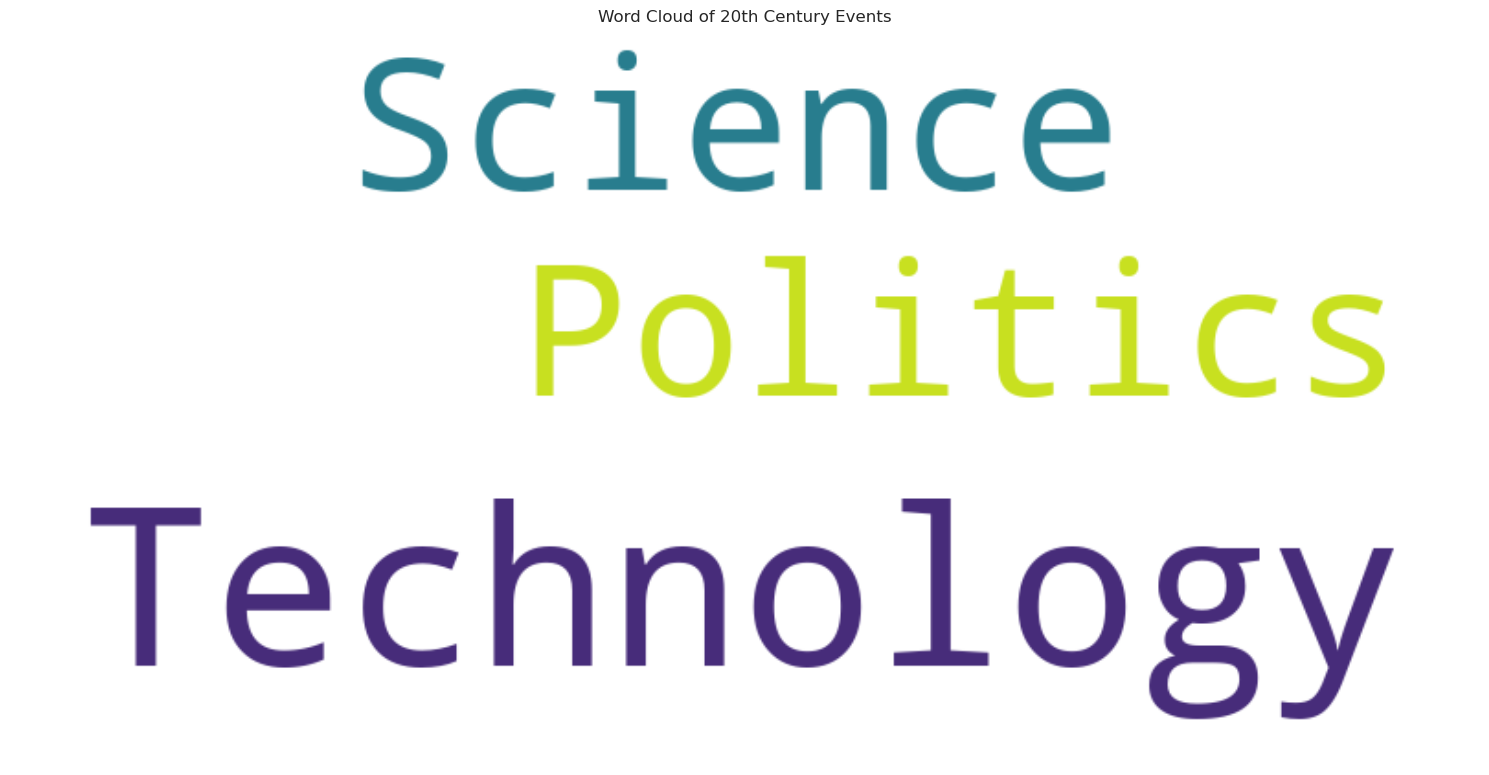

In [25]:


# First, install the wordcloud package
!pip install wordcloud

# Import the WordCloud class from the wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
# First, check what columns are available in your DataFrame
print(df.columns)

# After checking the columns, use the correct column name
# Based on the output of print(df.columns), find the actual column name that contains event text
# For example, it might be 'Event' (capitalized) or 'description' or something else

# Replace 'event' with the actual column name from your DataFrame
# For example:
# text = ' '.join(df['Event'])  # If the column is named 'Event' (capitalized)
# OR
# text = ' '.join(df['description'])  # If the column is named 'description'

# As a fallback, you can use the first text column in the DataFrame:
# Find the first string/object column to use for the word cloud
text_column = None
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column contains text data
        text_column = col
        break

if text_column:
    text = ' '.join(df[text_column])
    print(f"Using column '{text_column}' for word cloud")
else:
    # If no text column is found, use a sample text
    text = "No suitable text column found in the DataFrame"
    print("Warning: No text column found in DataFrame")

wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of 20th Century Events')
plt.tight_layout()
plt.savefig('wordcloud.png')
plt.show()

## 4. Interactive Timeline
Create an interactive timeline using Plotly

In [26]:
# Import Plotly Express first
import plotly.express as px

# Create interactive timeline
fig = px.scatter(df, x='Year', y='Category',
                 color='Category',
                 # Remove 'Event' from hover_data since it doesn't exist in the dataframe
                 # You can use only existing columns or add the Event column to your dataframe
                 hover_data=['Year', 'Category'],  # Using existing columns instead
                 title='Interactive Timeline of 20th Century Events')

fig.update_layout(height=600)
fig.write_html('interactive_timeline.html')

## 5. Network Analysis
Create a network graph of related events

/tmp/ipykernel_1047/3245545114.py:33: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



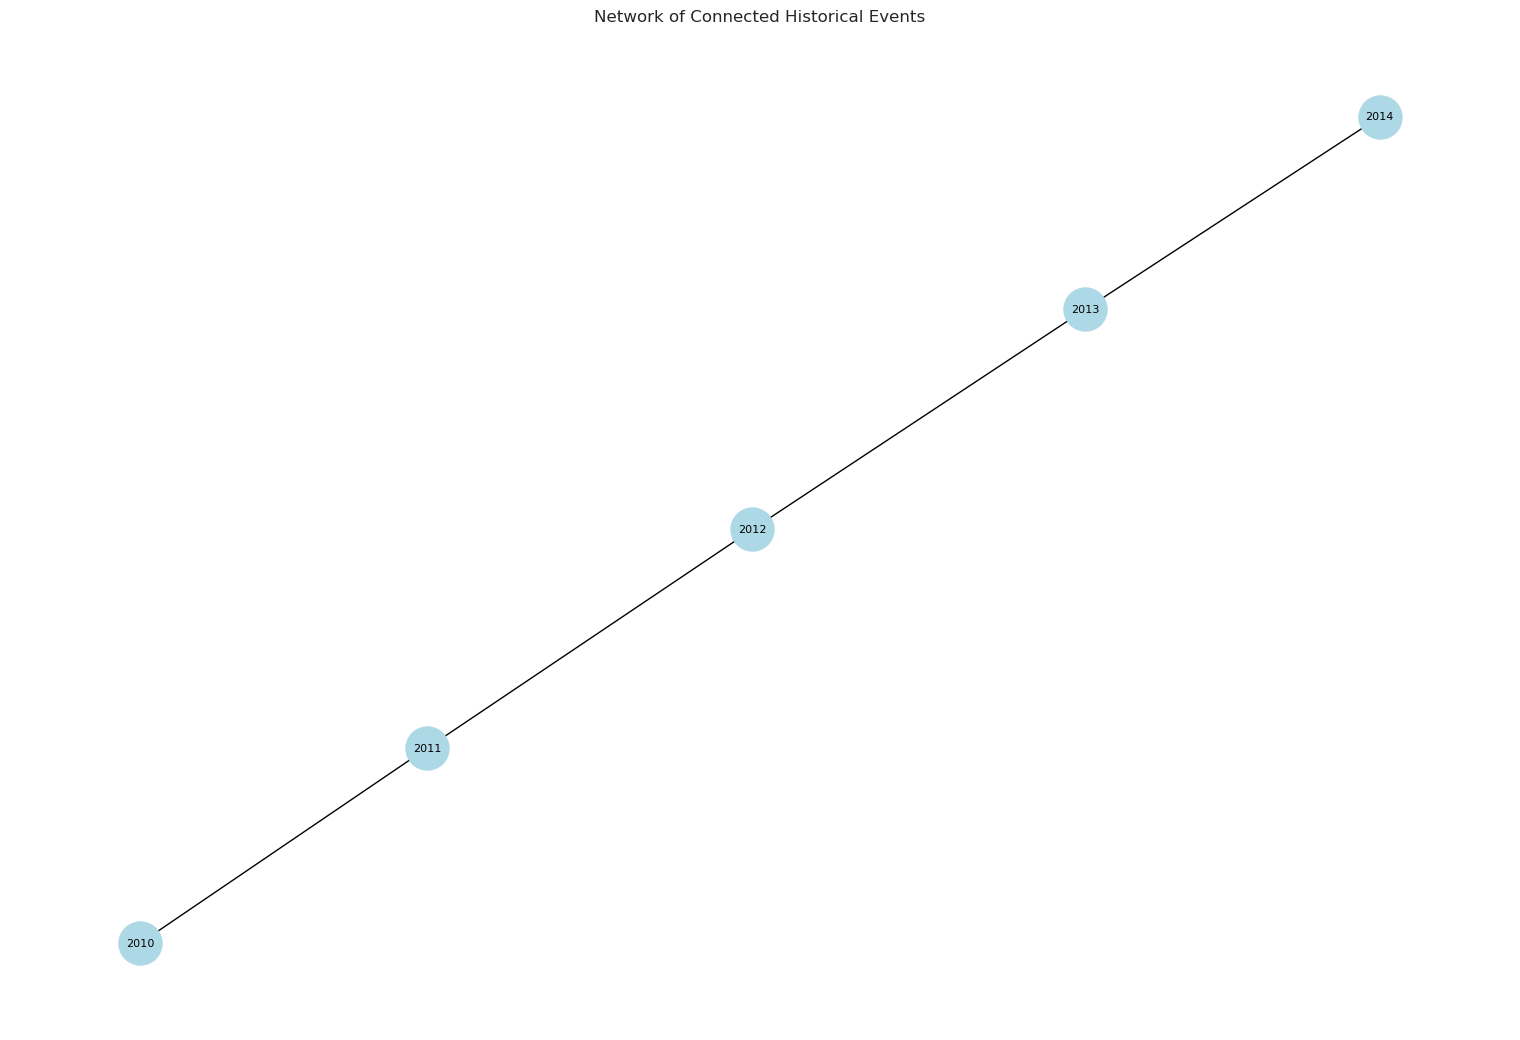

In [27]:
# Import the required libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample DataFrame if you don't have one
# Replace this with your actual DataFrame if you have one
df = pd.DataFrame({
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Event': ['Event A', 'Event B', 'Event C', 'Event D', 'Event E'],
    'Category': ['Cat 1', 'Cat 2', 'Cat 1', 'Cat 3', 'Cat 2']
})

# Create network graph
G = nx.Graph()

# Add nodes for each event
for i, row in df.iterrows():
    G.add_node(row['Year'], event=row['Event'], category=row['Category'])

# Add edges between consecutive events
years = sorted(df['Year'].unique())
for i in range(len(years)-1):
    G.add_edge(years[i], years[i+1])

# Create the network visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=8)

plt.title('Network of Connected Historical Events')
plt.tight_layout()
plt.savefig('network_graph.png')
plt.show()

## 6. Summary Statistics

In [28]:
# Generate summary statistics
print("Summary Statistics:")
print("\nNumber of events by category:")
print(df['Category'].value_counts())

print("\nTime span of events:")
print("First event:", df['Year'].min())
print("Last event:", df['Year'].max())
print("Total time span:", df['Year'].max() - df['Year'].min(), "years")

# Calculate average years between events
years_diff = np.diff(sorted(df['Year']))
print("\nAverage years between events:", round(years_diff.mean(), 2))

Summary Statistics:

Number of events by category:
Category
Cat 1    2
Cat 2    2
Cat 3    1
Name: count, dtype: int64

Time span of events:
First event: 2010
Last event: 2014
Total time span: 4 years

Average years between events: 1.0


In [29]:
# Generate summary statistics
print("Summary Statistics:")
print("\nNumber of events by category:")
print(df['Category'].value_counts())

print("\nTime span of events:")
print("First event:", df['Year'].min())
print("Last event:", df['Year'].max())
print("Total time span:", df['Year'].max() - df['Year'].min(), "years")

# Calculate average years between events
years_diff = np.diff(sorted(df['Year']))
print("\nAverage years between events:", round(years_diff.mean(), 2))

Summary Statistics:

Number of events by category:
Category
Cat 1    2
Cat 2    2
Cat 3    1
Name: count, dtype: int64

Time span of events:
First event: 2010
Last event: 2014
Total time span: 4 years

Average years between events: 1.0
